In [10]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [2]:
pd.set_option('display.max_columns', None)

# cancelled

In [3]:
can_df = pd.read_csv('train.csv')

In [4]:
can_df= can_df.drop(columns=['company','country','agent','reservation_status'])

In [5]:
can_df['children'].fillna(0,inplace=True)
categories = ['hotel','meal','market_segment',
                        'distribution_channel','is_repeated_guest','reserved_room_type','assigned_room_type',
                        'deposit_type','customer_type','arrival_date_month']
can_df[categories]=can_df[categories].astype('category')
can_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91531 entries, 0 to 91530
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   ID                              91531 non-null  int64   
 1   hotel                           91531 non-null  category
 2   is_canceled                     91531 non-null  int64   
 3   lead_time                       91531 non-null  int64   
 4   arrival_date_year               91531 non-null  int64   
 5   arrival_date_month              91531 non-null  category
 6   arrival_date_week_number        91531 non-null  int64   
 7   arrival_date_day_of_month       91531 non-null  int64   
 8   stays_in_weekend_nights         91531 non-null  int64   
 9   stays_in_week_nights            91531 non-null  int64   
 10  adults                          91531 non-null  int64   
 11  children                        91531 non-null  float64 
 12  babies            

In [6]:
y = can_df['is_canceled']
corr_canceled = can_df.corr()['is_canceled']
corr_canceled.abs().sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.326065
total_of_special_requests         0.239278
required_car_parking_spaces       0.194895
booking_changes                   0.143083
previous_cancellations            0.131878
days_in_waiting_list              0.064711
adults                            0.060170
previous_bookings_not_canceled    0.057126
adr                               0.029649
babies                            0.029602
arrival_date_week_number          0.024605
arrival_date_year                 0.021706
stays_in_week_nights              0.019388
ID                                0.009577
arrival_date_day_of_month         0.008432
stays_in_weekend_nights           0.008230
children                          0.003777
Name: is_canceled, dtype: float64

In [7]:
X = can_df.drop(['is_canceled'],axis=1)
can_df.head()

,ID,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,-6.305161,0,0,2015-07-01
1,1,City Hotel,0,257,2015,July,27,1,0,2,1,0.0,0,HB,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,0,Transient,75.052227,0,0,2015-07-03
2,2,City Hotel,0,257,2015,July,27,1,0,2,2,0.0,0,HB,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,74.546401,0,0,2015-07-03
3,3,City Hotel,0,257,2015,July,27,1,0,2,2,0.0,0,HB,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,76.376288,0,0,2015-07-03
4,4,City Hotel,0,257,2015,July,27,1,0,2,2,0.0,0,HB,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,49.411647,0,0,2015-07-03


In [8]:
variables = pd.get_dummies(X,prefix_sep='-',drop_first=True)
variables.isnull().sum().sum()

0

In [11]:
X_train,X_test,y_train,y_test= train_test_split(variables,y)
# Feature Scaling: Without feature scaling, the accuracy was quite low.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
reg = LogisticRegression()
reg.fit(X_train,y_train)

print(f'Best Training Accuracy: {reg.score(X_train, y_train)}')
print(f'Best Testing Accuracy: {reg.score(X_test, y_test)}')

Best Training Accuracy: 0.9551043001981121
Best Testing Accuracy: 0.9515797753791024


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(X_train,y_train)
print(f'Best Training Accuracy: {classifier.score(X_train, y_train)}')
print(f'Best Testing Accuracy: {classifier.score(X_test, y_test)}')

Best Training Accuracy: 0.9091889057219438
Best Testing Accuracy: 0.8910981951667176


## elu NN adr

In [2]:
train_df = pd.read_csv('train.csv')
train_df = train_df.drop(index=31980)

In [3]:
leadtime = train_df['lead_time']
arrivaldateyear = train_df['arrival_date_year']
arrivaldateweekno = train_df['arrival_date_week_number']
arrivaldatedayofmonth = train_df['arrival_date_day_of_month']
staysweekendnights = train_df['stays_in_weekend_nights']
staysweeknights = train_df['stays_in_week_nights']
adults = train_df['adults']
children = train_df['children']
babies = train_df['babies']
isrepeatedguest = train_df['is_repeated_guest'] 
previouscancellations = train_df['previous_cancellations']
previousbookingsnotcanceled = train_df['previous_bookings_not_canceled']
bookingchanges = train_df['booking_changes']
agent = train_df['agent']
company = train_df['company']
dayswaitinglist = train_df['days_in_waiting_list']
adr = train_df['adr']
rcps = train_df['required_car_parking_spaces']
totalsqr = train_df['total_of_special_requests']

In [4]:
train_df['country']=train_df['country'].fillna(train_df['country'].value_counts().index[0])
train_df['agent']=train_df['agent'].fillna(train_df['agent'].value_counts().index[0])
train_df['company']=train_df['company'].fillna(0)
train_df['children']=train_df['children'].fillna(train_df['children'].median())

In [5]:
y1 = np.array(adr)
print(max(y1))
print(np.argmax(y1))
print(min(y1))
print(np.argmin(y1))

503.4046040161461
1072
-144.70448560551358
79722


In [8]:
iscanceled = train_df.is_canceled.astype("category").cat.codes
iscanceledcat=pd.Series(iscanceled)
arrivaldatemonth = train_df.arrival_date_month.astype("category").cat.codes
arrivaldatemonthcat=pd.Series(arrivaldatemonth)
mealcat=train_df.meal.astype("category").cat.codes
mealcat=pd.Series(mealcat)
countrycat=train_df.country.astype("category").cat.codes
countrycat=pd.Series(countrycat)
marketsegmentcat=train_df.market_segment.astype("category").cat.codes
marketsegmentcat=pd.Series(marketsegmentcat)
distributionchannelcat=train_df.distribution_channel.astype("category").cat.codes
distributionchannelcat=pd.Series(distributionchannelcat)
reservedroomtypecat=train_df.reserved_room_type.astype("category").cat.codes
reservedroomtypecat=pd.Series(reservedroomtypecat)
assignedroomtypecat=train_df.assigned_room_type.astype("category").cat.codes
assignedroomtypecat=pd.Series(assignedroomtypecat)
deposittypecat=train_df.deposit_type.astype("category").cat.codes
deposittypecat=pd.Series(deposittypecat)
customertypecat=train_df.customer_type.astype("category").cat.codes
customertypecat=pd.Series(customertypecat)
reservationstatuscat=train_df.reservation_status.astype("category").cat.codes
reservationstatuscat=pd.Series(reservationstatuscat)
isrepeatedguestcat = train_df.is_repeated_guest.astype("category").cat.codes
isrepeatedguestcat=pd.Series(isrepeatedguestcat)
agentcat = train_df.agent.astype("category").cat.codes
agentcat=pd.Series(agentcat)
companycat = train_df.company.astype("category").cat.codes
companycat=pd.Series(companycat)

In [10]:
x1 = np.column_stack((iscanceled,countrycat,marketsegmentcat,deposittypecat,customertypecat,rcps,arrivaldateweekno))
x1 = sm.add_constant(x1, prepend=True)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(x1, y1)

In [12]:
y_train=np.reshape(y_train, (-1,1))
y_val=np.reshape(y_val, (-1,1))

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

print(scaler_x.fit(X_train))
xtrain_scale=scaler_x.transform(X_train)
print(scaler_x.fit(X_val))
xval_scale=scaler_x.transform(X_val)

print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)
print(scaler_y.fit(y_val))
yval_scale=scaler_y.transform(y_val)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


In [13]:
ytrain_scale

array([[0.38764436],
       [0.35965962],
       [0.35434166],
       ...,
       [0.31499836],
       [0.43360256],
       [0.35602733]])

In [29]:
model = Sequential()
model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='elu'))
model.add(Dropout(0.2))
model.add(Dense(2670, activation='elu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
model.add(Dropout(0.2))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 8)                 72        
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 2670)              24030     
_________________________________________________________________
dropout_1 (Dropout)          (None, 2670)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 2671      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1)                 0         
Total params: 26,773
Trainable params: 26,773
Non-trainable params: 0
__________________________________________________

In [30]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(xtrain_scale, ytrain_scale, epochs=30, batch_size=150, verbose=1, validation_split=0.2)
predictions = model.predict(xval_scale)

Epoch 1/30
367/367 [==============================] - 2s 3ms/step - loss: 0.0411 - mse: 0.0411 - mae: 0.1410 - val_loss: 0.0114 - val_mse: 0.0114 - val_mae: 0.0840
Epoch 2/30
367/367 [==============================] - 1s 3ms/step - loss: 0.0360 - mse: 0.0360 - mae: 0.1256 - val_loss: 0.0108 - val_mse: 0.0108 - val_mae: 0.0813
Epoch 3/30
367/367 [==============================] - 1s 3ms/step - loss: 0.0357 - mse: 0.0357 - mae: 0.1246 - val_loss: 0.0130 - val_mse: 0.0130 - val_mae: 0.0913
Epoch 4/30
367/367 [==============================] - 1s 3ms/step - loss: 0.0358 - mse: 0.0358 - mae: 0.1252 - val_loss: 0.0123 - val_mse: 0.0123 - val_mae: 0.0881
Epoch 5/30
367/367 [==============================] - 1s 3ms/step - loss: 0.0358 - mse: 0.0358 - mae: 0.1246 - val_loss: 0.0150 - val_mse: 0.0150 - val_mae: 0.1005
Epoch 6/30
367/367 [==============================] - 1s 3ms/step - loss: 0.0357 - mse: 0.0357 - mae: 0.1246 - val_loss: 0.0100 - val_mse: 0.0100 - val_mae: 0.0779
Epoch 7/30
367/3

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


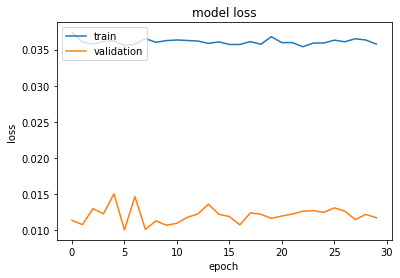

In [31]:

print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [32]:
predictions = scaler_y.inverse_transform(predictions)
predictions

array([[ 75.55385],
       [105.99616],
       [114.29068],
       ...,
       [100.5367 ],
       [ 75.55385],
       [ 92.6188 ]], dtype=float32)

In [33]:
mean_absolute_error(y_val, predictions)

35.82076895716465

In [34]:
mean_squared_error(y_val, predictions)
math.sqrt(mean_squared_error(y_val, predictions))

46.33618241631022

In [35]:
np.mean(y_val)

84.53872712139851

In [36]:
np.mean(predictions)

90.80782

In [37]:
test_df = pd.read_csv('test.csv')
test_df.isnull().sum()

ID                                    0
hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                              20
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              3123
company                           26676


In [38]:
test_df['country']=test_df['country'].fillna(test_df['country'].value_counts().index[0])
test_df['agent']=test_df['agent'].fillna(test_df['agent'].value_counts().index[0])
test_df['company']=test_df['company'].fillna(0)


In [50]:
arrivaldatemonth = test_df.arrival_date_month.astype("category").cat.codes
arrivaldatemonthcat=pd.Series(arrivaldatemonth)
mealcat=test_df.meal.astype("category").cat.codes
mealcat=pd.Series(mealcat)
countrycat=test_df.country.astype("category").cat.codes
countrycat=pd.Series(countrycat)
marketsegmentcat=test_df.market_segment.astype("category").cat.codes
marketsegmentcat=pd.Series(marketsegmentcat)
distributionchannelcat=test_df.distribution_channel.astype("category").cat.codes
distributionchannelcat=pd.Series(distributionchannelcat)
reservedroomtypecat=test_df.reserved_room_type.astype("category").cat.codes
reservedroomtypecat=pd.Series(reservedroomtypecat)
assignedroomtypecat=test_df.assigned_room_type.astype("category").cat.codes
assignedroomtypecat=pd.Series(assignedroomtypecat)
deposittypecat=test_df.deposit_type.astype("category").cat.codes
deposittypecat=pd.Series(deposittypecat)
customertypecat=test_df.customer_type.astype("category").cat.codes
customertypecat=pd.Series(customertypecat)

isrepeatedguestcat = test_df.is_repeated_guest.astype("category").cat.codes
isrepeatedguestcat=pd.Series(isrepeatedguestcat)
agentcat = test_df.agent.astype("category").cat.codes
agentcat=pd.Series(agentcat)
companycat = test_df.company.astype("category").cat.codes
companycat=pd.Series(companycat)

In [40]:
atest = np.column_stack((iscanceled,countrycat,marketsegmentcat,deposittypecat,customertypecat,rcps,arrivaldateweekno))
atest = sm.add_constant(x1, prepend=True)

In [42]:
scaler_test = MinMaxScaler()
print(scaler_test.fit(atest))
ascale=scaler_test.transform(atest)

MinMaxScaler()


In [43]:
np.shape(ascale)

(91530, 8)

In [44]:
bpred = model.predict(ascale)
bpred

array([[0.2897378 ],
       [0.30875343],
       [0.30875343],
       ...,
       [0.31921282],
       [0.290711  ],
       [0.28499252]], dtype=float32)

In [45]:
bpred = scaler_y.inverse_transform(bpred)

In [46]:
bpred

array([[73.97991 ],
       [85.476776],
       [85.476776],
       ...,
       [91.80053 ],
       [74.568306],
       [71.110916]], dtype=float32)

In [47]:
bpred.mean()

86.12072